In [2]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
!unzip /content/corn

Archive:  /content/corn.zip
   creating: corn/
   creating: corn/test/
   creating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (451).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (452).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (453).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (454).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (455).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (456).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (457).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (458).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (459).JPG  
  inflating: corn/test/Corn___Cercospora_leaf_spot Gray_leaf_spot/image (460).jpg  
  inflating: corn/test

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
        rescale=1./255)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/corn/train',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/corn/val',  # This is the source directory for training images
        target_size=(224, 224),  # All images will be resized to 150x150
        class_mode='categorical')

Found 1600 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [5]:
model = tf.keras.applications.VGG19(weights = "imagenet", include_top=False, input_shape = (224, 224, 3))
#Adding custom Layers
x = model.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation="relu")(x)
predictions = tf.keras.layers.Dense(4, activation="softmax")(x)
model = tf.keras.Model(inputs = model.input, outputs = predictions)
model.summary()
model.compile(optimizer='adam',
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

80134624/80134624 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [6]:
model_history = model.fit(
train_generator,
epochs = 30,
validation_data = validation_generator)

Epoch 1/30
50/50 [==============================] - 51s 485ms/step - loss: 15.6771 - accuracy: 0.2356 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 2/30
50/50 [==============================] - 23s 450ms/step - loss: 1.3866 - accuracy: 0.2438 - val_loss: 1.3864 - val_accuracy: 0.2500
Epoch 3/30
50/50 [==============================] - 23s 459ms/step - loss: 1.3866 - accuracy: 0.2325 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 4/30
50/50 [==============================] - 23s 460ms/step - loss: 1.3866 - accuracy: 0.2419 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 5/30
50/50 [==============================] - 23s 463ms/step - loss: 1.3866 - accuracy: 0.2375 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 6/30
50/50 [==============================] - 24s 479ms/step - loss: 1.3865 - accuracy: 0.2356 - val_loss: 1.3863 - val_accuracy: 0.2500
Epoch 7/30
50/50 [==============================] - 24s 477ms/step - loss: 1.3866 - accuracy: 0.2269 - val_loss: 1.3863 - val_accuracy: 0.250

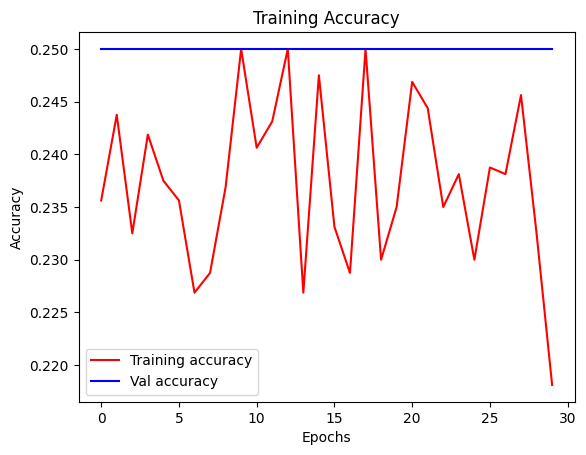

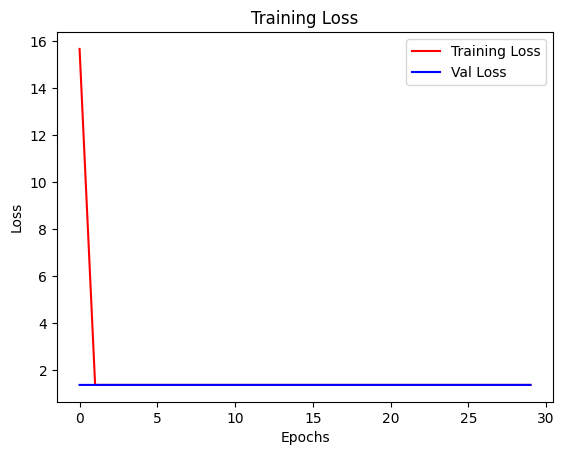

In [7]:
import matplotlib.pyplot as plt
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Val accuracy')
plt.title('Training Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Val Loss')
plt.title('Training Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()